In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from pycaret.regression import *

In [22]:
date_Start = "2018-12-31"
date_End = "2018-01-01"


In [23]:
df = pd.read_csv("Merged_data.csv")
df

,Date,Square Ft Ordered,Color Chosen,Gutter Type
0,2018-01-01,138,18,1
1,2018-01-02,293,27,2
2,2018-01-03,82,12,3
3,2018-01-04,58,1,2
4,2018-01-05,76,1,1
...,...,...,...,...
360,2018-12-27,213,5,1
361,2018-12-28,225,10,2
362,2018-12-29,62,27,3
363,2018-12-30,261,12,1


In [24]:
df['Month'] = df['Date'].str[5:7]
df['Month'] = df['Month'].astype('int32')
df

,Date,Square Ft Ordered,Color Chosen,Gutter Type,Month
0,2018-01-01,138,18,1,1
1,2018-01-02,293,27,2,1
2,2018-01-03,82,12,3,1
3,2018-01-04,58,1,2,1
4,2018-01-05,76,1,1,1
...,...,...,...,...,...
360,2018-12-27,213,5,1,12
361,2018-12-28,225,10,2,12
362,2018-12-29,62,27,3,12
363,2018-12-30,261,12,1,12


In [25]:
df.groupby('Month').sum()

,Square Ft Ordered,Color Chosen,Gutter Type
Month,,,
1,5525,406,57
2,4412,436,40
3,6078,446,47
4,5283,397,52
5,5223,463,53
6,4320,383,48
7,5293,502,35
8,5931,480,45
9,4551,354,50


<AxesSubplot:>

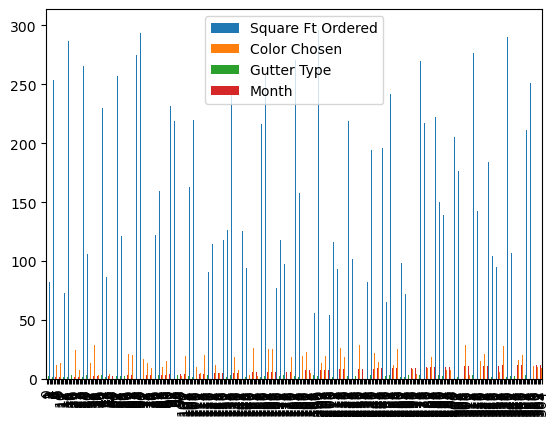

In [26]:
df.plot.bar(rot=90)

In [27]:
#locking just colors and gutter type
X = df[['Color Chosen', 'Gutter Type']].shift().dropna()
X


,Color Chosen,Gutter Type
1,18.0,1.0
2,27.0,2.0
3,12.0,3.0
4,1.0,2.0
5,1.0,1.0
...,...,...
360,25.0,2.0
361,5.0,1.0
362,10.0,2.0
363,27.0,3.0


In [28]:
y = df['Square Ft Ordered'].copy()
y.value_counts()


121    6
50     5
184    4
287    4
236    4
      ..
91     1
190    1
167    1
163    1
261    1
Name: Square Ft Ordered, Length: 203, dtype: int64

In [29]:
#copy df
future_df = df.copy()
#create data set
X = np.array(future_df[df.columns])
#create target
y = np.array(df['Square Ft Ordered'])
#split data train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle=False)

In [30]:
#create train dataframe
train_df = pd.DataFrame(X_train, columns = df.columns).dropna()
#show train
train_df.head()

,Date,Square Ft Ordered,Color Chosen,Gutter Type,Month
0,2018-01-01,138,18,1,1
1,2018-01-02,293,27,2,1
2,2018-01-03,82,12,3,1
3,2018-01-04,58,1,2,1
4,2018-01-05,76,1,1,1


In [32]:
#create test dataframe
test_df = pd.DataFrame(X_test, columns = future_df.columns).dropna()
#show data
test_df.head()

,Date,Square Ft Ordered,Color Chosen,Gutter Type,Month
0,2018-11-07,92,4,1,11
1,2018-11-08,182,3,0,11
2,2018-11-09,145,12,0,11
3,2018-11-10,217,4,3,11
4,2018-11-11,277,29,2,11


In [36]:
#setup the model
regression_setup = setup(data = train_df, target = 'Square Ft Ordered', session_id = 1, use_gpu=True)

ValueError: y contains previously unseen labels: [54, 63, 78, 81, 91, 96, 97, 98, 116, 120, 132, 137, 138, 139, 141, 144, 148, 163, 165, 167, 168, 173, 175, 189, 190, 205, 210, 224, 239, 243, 244, 248, 255, 264, 266, 269, 291, 295]

In [ ]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
logistic_regression_model = LogisticRegression(random_state=7)
lr_model =logistic_regression_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y)

In [ ]:
#Create and fit model for prediction
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)